In [30]:
import numpy as np
import pandas as pd

# Setting initial parameters
time_steps = 14
initial_day = 0
data_directory = "/content/drive/MyDrive/"



In [39]:
# Loading and displaying data
data = pd.read_csv(data_directory + "/sales_train_validation.csv")
print(data.head(5))
print(data.info())



                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  


In [42]:
# Function to reduce memory usage
def optimize_data_types(dataframe):
    float_columns = [column for column in dataframe if dataframe[column].dtype == "float64"]
    integer_columns = [column for column in dataframe if dataframe[column].dtype in ["int64", "int32"]]
    dataframe[float_columns] = dataframe[float_columns].astype(np.float32)
    dataframe[integer_columns] = dataframe[integer_columns].astype(np.int16)
    return dataframe

# Optimizing data types
data = optimize_data_types(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int16(1913), object(6)
memory usage: 112.6+ MB


In [43]:
print(data.head(5))

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  


In [44]:
#Take the transpose so that we have one day for each row, and 30490 items' sales as columns
data = data.T
data.head(8)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
id,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,WI
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0


In [45]:
#Remove id, item_id, dept_id, cat_id, store_id, state_id columns
data = data[6 + initial_day:]
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [46]:
# Processing calendar data
calendar_data = pd.read_csv(data_directory + "/calendar.csv")
days_to_event = pd.DataFrame(np.zeros((1969, 1)))

for index, row in calendar_data.iterrows():
    if not pd.isnull(calendar_data["event_name_1"][index]):
        days_to_event.iloc[index - 1, 0] = 1



In [47]:
del calendar_data

In [48]:
# Preparing event data for training and testing
event_data_test = days_to_event[1913:1941]
event_data = days_to_event[initial_day:1913]
event_data.columns = ["day_before_event"]
event_data.index = data.index

# Merging event data with main data
data = pd.concat([data, event_data], axis=1)

In [49]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
data.columns = data.columns.astype(str)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [55]:
# Preparing training data
X_train, y_train = [], []
for i in range(time_steps, 1913 - initial_day):
    X_train.append(scaled_data[i - time_steps:i])
    y_train.append(scaled_data[i][0:30490])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)


(1899, 14, 30491)
(1899, 30490)


In [56]:
del scaled_data

In [57]:
# Building the LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=40, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=300))
model.add(Dropout(0.2))
model.add(Dense(units=30490))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=32, batch_size=44)



Epoch 1/32
44/44 [==============================] - 6s 33ms/step - loss: 0.0159
Epoch 2/32
44/44 [==============================] - 1s 33ms/step - loss: 0.0137
Epoch 3/32
44/44 [==============================] - 1s 32ms/step - loss: 0.0134
Epoch 4/32
44/44 [==============================] - 1s 32ms/step - loss: 0.0131
Epoch 5/32
44/44 [==============================] - 1s 32ms/step - loss: 0.0130
Epoch 6/32
44/44 [==============================] - 1s 32ms/step - loss: 0.0128
Epoch 7/32
44/44 [==============================] - 1s 33ms/step - loss: 0.0126
Epoch 8/32
44/44 [==============================] - 1s 33ms/step - loss: 0.0125
Epoch 9/32
44/44 [==============================] - 1s 33ms/step - loss: 0.0124
Epoch 10/32
44/44 [==============================] - 1s 33ms/step - loss: 0.0123
Epoch 11/32
44/44 [==============================] - 1s 33ms/step - loss: 0.0122
Epoch 12/32
44/44 [==============================] - 1s 32ms/step - loss: 0.0121
Epoch 13/32
44/44 [==================

In [58]:
event_data_test.shape

(28, 1)

In [63]:
inputs= data[-time_steps:]
inputs = scaler.transform(inputs)

In [64]:
X_test = []
X_test.append(inputs[0:time_steps])
X_test = np.array(X_test)
predictions = []
#"eventDaysTest" will be used as input for predicting (We will forecast the days 1913-1941)
daysBeforeEventTest = days_to_event[1913:1941]
#"eventDays" will be used for training as a feature.
daysBeforeEvent = days_to_event[initial_day:1913]

for j in range(time_steps,time_steps + 28):
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_sales_price = model.predict(X_test[0,j - time_steps:j].reshape(1, time_steps, 30491))
    testInput = np.column_stack((np.array(predicted_sales_price), daysBeforeEventTest[0][1913 + j - time_steps]))
    X_test = np.append(X_test, testInput).reshape(1,j + 1,30491)
    predicted_sales_price = scaler.inverse_transform(testInput)[:,0:30490]
    predictions.append(predicted_sales_price)

1/1 [==============================] - 0s 18ms/step


In [65]:

# Preparing the submission file
import time
submission_data = pd.DataFrame(data=np.array(predictions).reshape(28, 30490)).T
submission_data = pd.concat((submission_data, submission_data), ignore_index=True)
sample_submission = pd.read_csv(data_directory + "/sample_submission.csv")
submission_data["id"] = sample_submission[["id"]]
submission_data = submission_data[["id"] + list(submission_data.columns[:-1])]
submission_data.columns = ["id"] + [f"F{i}" for i in range(1, 29)]
current_time = time.strftime("%d%m%Y_%H%M%S")
submission_data.to_csv("submission.csv", index=False)


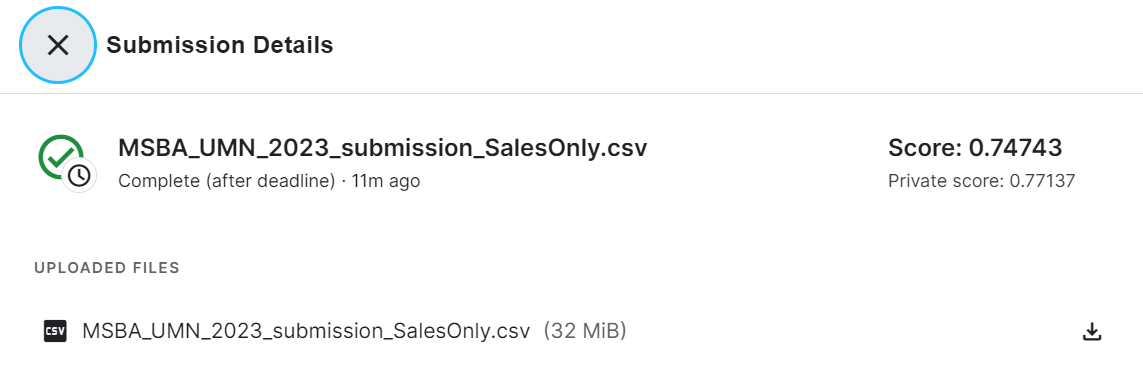

In [66]:
submission_data.to_csv("MSBA_UMN_2023_submission_SalesOnly.csv", index=False)


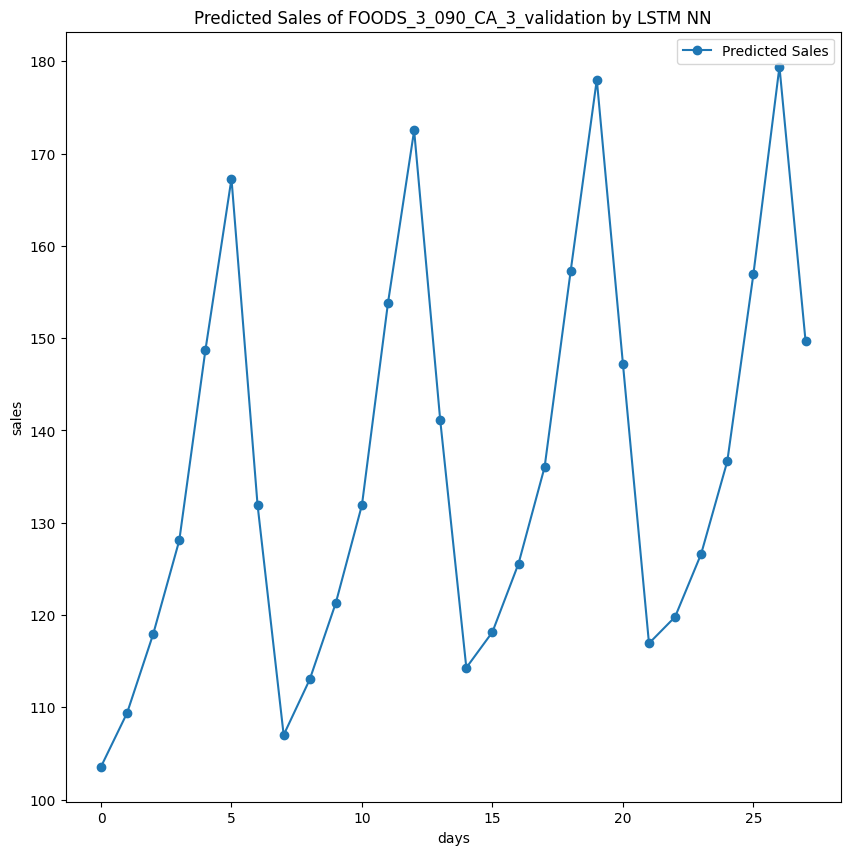

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv(data_directory + '/test1.csv')
nn=pd.read_csv('MSBA_UMN_2023_submission_SalesOnly.csv')
test.sort_values(['id','date'],inplace=True)
tt=test.pivot_table(index='id',values='sales',columns='d')
tt.reset_index(level=0,inplace=True)
tt['id']=tt['id'].apply(lambda x:x.replace('evaluation','validation'))
pred_sales=nn[nn['id']=='FOODS_3_090_CA_3_validation'].values.flatten()[1:]
plt.figure(figsize=(10,10))
plt.plot(pred_sales,label='Predicted Sales',marker='o')
plt.title("Predicted Sales of FOODS_3_090_CA_3_validation by LSTM NN")
plt.ylabel('sales')
plt.xlabel('days')
plt.legend()
plt.show()

In [70]:
submission_data.shape

(60980, 29)